# Explore

- `random_state`=123

Plan
- [x] Split data
- [x] Get Univariate Insights
- [ ] Get Bivariate Insights to target (quality)
    - scatterplots with quality on the y
    - correlations + heatmap
    - barplot, swarmplot, and/or boxplot with quality on y and color on x

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.ticker import FuncFormatter
from matplotlib import patches

%config InlineBackend.figure_format = 'retina'
import seaborn as sns

import sys
import os
home_directory_path = os.path.expanduser('~')
sys.path.append(home_directory_path +'/utils')

from wrangle import split_data

import explore_utils as e

from sklearn.preprocessing import MinMaxScaler

from sklearn.cluster import KMeans

from itertools import combinations
import wrangle as w

In [2]:
import warnings
warnings.filterwarnings("ignore")

Acquire and split data

In [3]:
df = w.wrangle()

train, validate, test = split_data(df, validate_size=.15, test_size=.15, random_state=123)

**Univariate Analysis**

Notes:
- `color`: 75/25, white/red whine
- `quality`: quality is approximately normal. scores of 3 and 9 are rare. 92% have scores 5-7. 44% have a score of 6

QUALITY


quality  Count  Frequency
0        6   1635   0.439044
1        5   1234   0.331364
2        7    585   0.157089
3        4    143   0.038400
4        8     99   0.026584
5        3     25   0.006713
6        9      3   0.000806

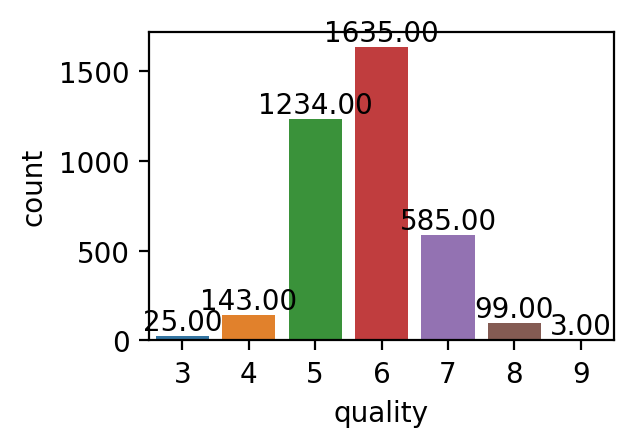


RED


red  Count  Frequency
0    0   2787   0.748389
1    1    937   0.251611

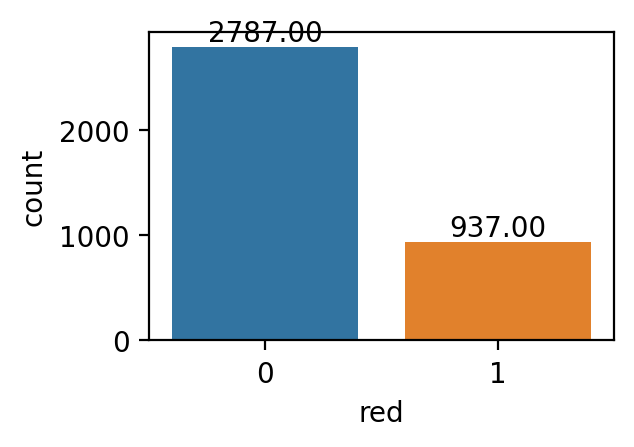

In [4]:
e.explore_univariate_categorical_cols(train)

Descriptive Stats:



fixed acidity  volatile acidity  citric acid  residual sugar  \
count    3724.000000       3724.000000  3724.000000     3724.000000   
mean        7.185956          0.344437     0.316114        5.037151   
std         1.308340          0.168740     0.148539        4.445025   
min         3.800000          0.080000     0.000000        0.600000   
25%         6.400000          0.230000     0.240000        1.800000   
50%         6.900000          0.300000     0.310000        2.700000   
75%         7.700000          0.410000     0.390000        7.500000   
max        15.900000          1.580000     1.660000       31.600000   

         chlorides  free sulfur dioxide  total sulfur dioxide      density  \
count  3724.000000          3724.000000           3724.000000  3724.000000   
mean      0.056674            30.127148            114.646214     0.994503   
std       0.035983            17.967870             56.942340     0.002882   
min       0.012000             1.000000              6.000000     0.987110   
25%       0.038000            16.000000             76.000000     0.992200   
50%       0.047000            28.000000            117.000000     0.994655   
75%       0.066000            41.000000            155.000000     0.996683   
max       0.611000           289.000000            440.000000     1.010300   

                pH    sulphates      alcohol  
count  3724.000000  3724.000000  3724.000000  
mean      3.227368     0.531745    10.544962  
std       0.162114     0.147852     1.189567  
min       2.720000     0.250000     8.000000  
25%       3.120000     0.430000     9.500000  
50%       3.220000     0.510000    10.400000  
75%       3.330000     0.600000    11.400000  
max       4.010000     2.000000    14.900000

------------------------------------------------------------ 
 FIXED ACIDITY 

Most Frequent Values:
6.6    199
6.8    193
6.4    185
Name: fixed acidity, dtype: int64


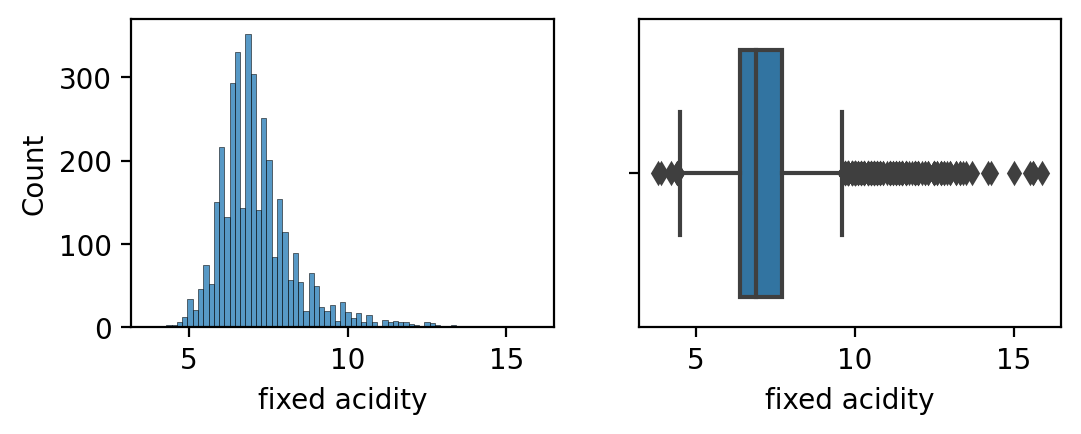


------------------------------------------------------------ 
 VOLATILE ACIDITY 

Most Frequent Values:
0.28    172
0.24    158
0.26    154
Name: volatile acidity, dtype: int64


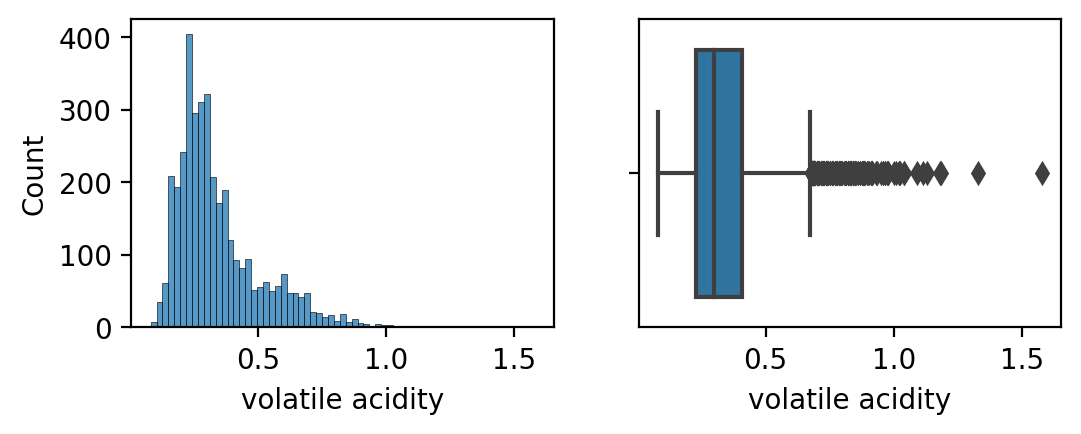


------------------------------------------------------------ 
 CITRIC ACID 

Most Frequent Values:
0.30    187
0.32    163
0.28    163
Name: citric acid, dtype: int64


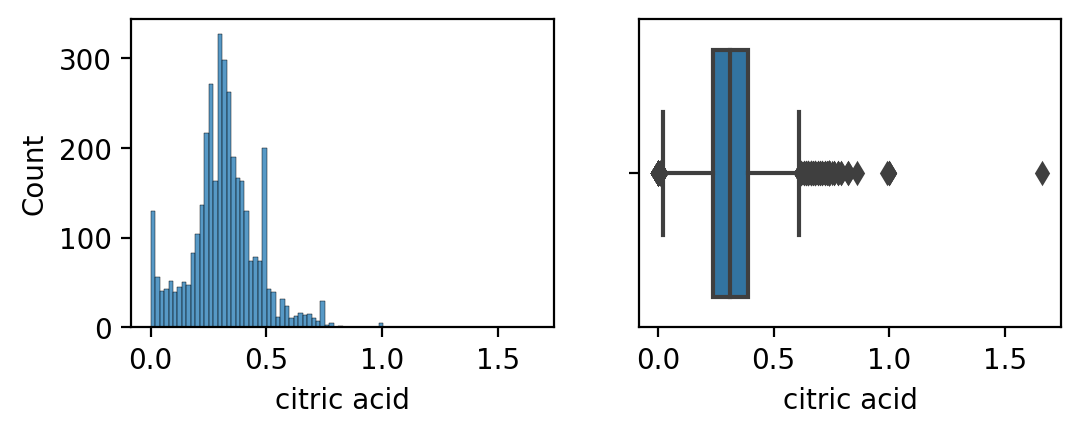


------------------------------------------------------------ 
 RESIDUAL SUGAR 

Most Frequent Values:
1.6    137
1.4    135
2.0    127
Name: residual sugar, dtype: int64


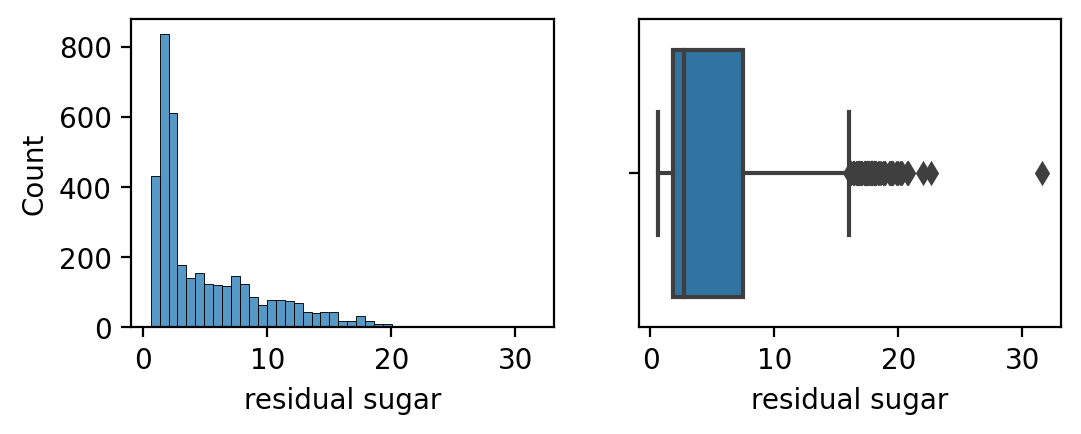


------------------------------------------------------------ 
 CHLORIDES 

Most Frequent Values:
0.042    113
0.044    111
0.036    110
Name: chlorides, dtype: int64


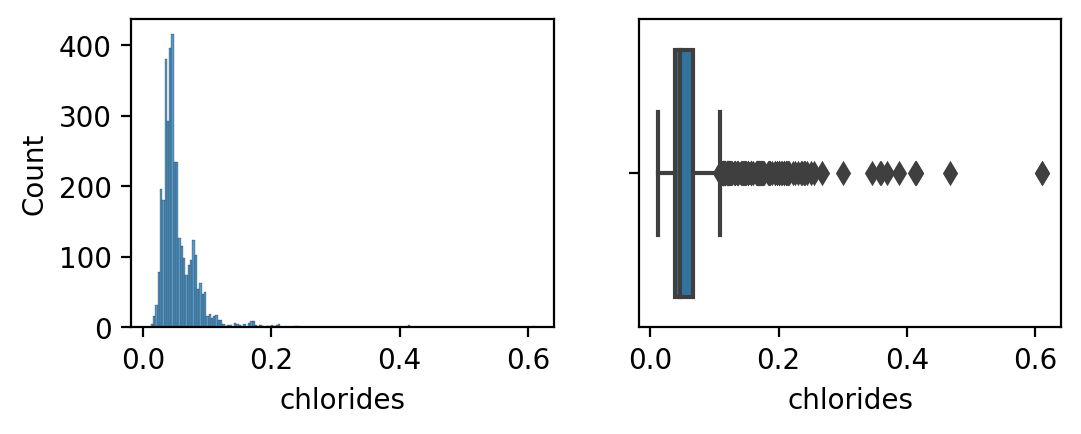


------------------------------------------------------------ 
 FREE SULFUR DIOXIDE 

Most Frequent Values:
29.0    98
6.0     98
26.0    96
Name: free sulfur dioxide, dtype: int64


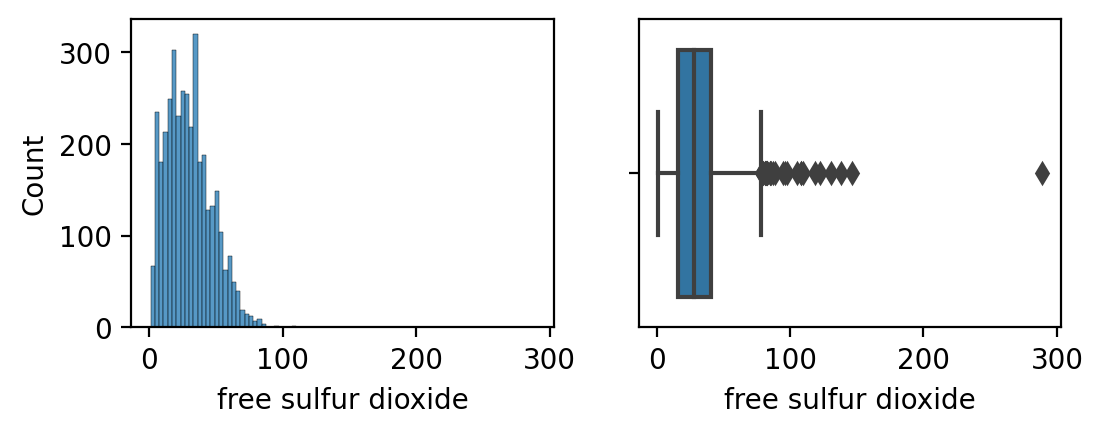


------------------------------------------------------------ 
 TOTAL SULFUR DIOXIDE 

Most Frequent Values:
98.0     39
128.0    36
111.0    36
Name: total sulfur dioxide, dtype: int64


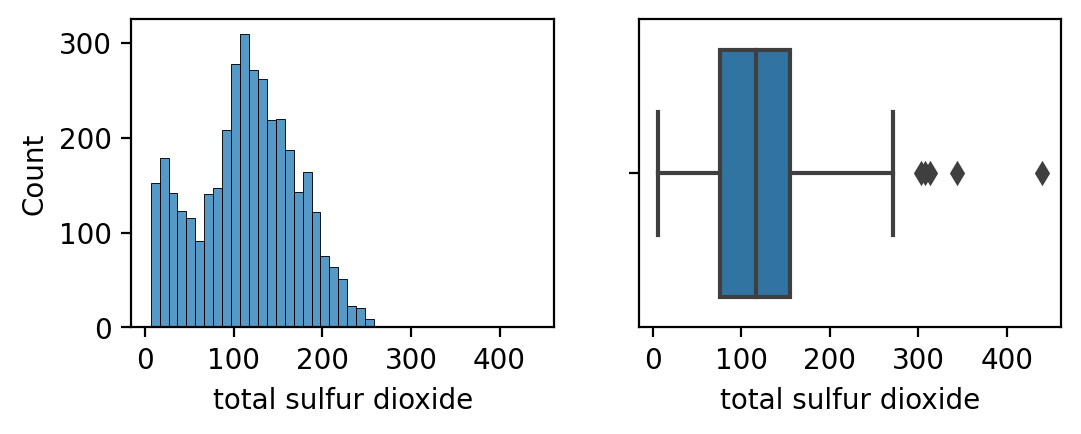


------------------------------------------------------------ 
 DENSITY 

Most Frequent Values:
0.9920    44
0.9934    41
0.9972    41
Name: density, dtype: int64


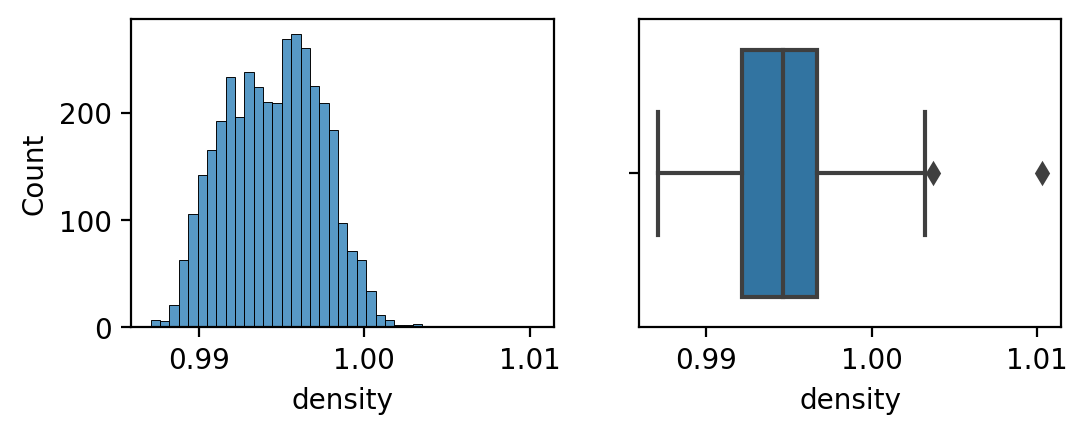


------------------------------------------------------------ 
 PH 

Most Frequent Values:
3.16    108
3.15    106
3.19    101
Name: pH, dtype: int64


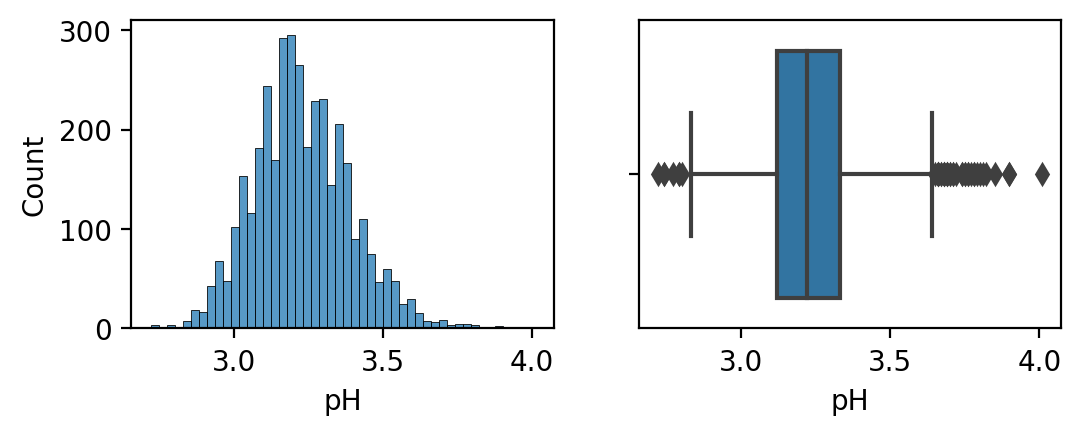


------------------------------------------------------------ 
 SULPHATES 

Most Frequent Values:
0.50    147
0.44    139
0.46    135
Name: sulphates, dtype: int64


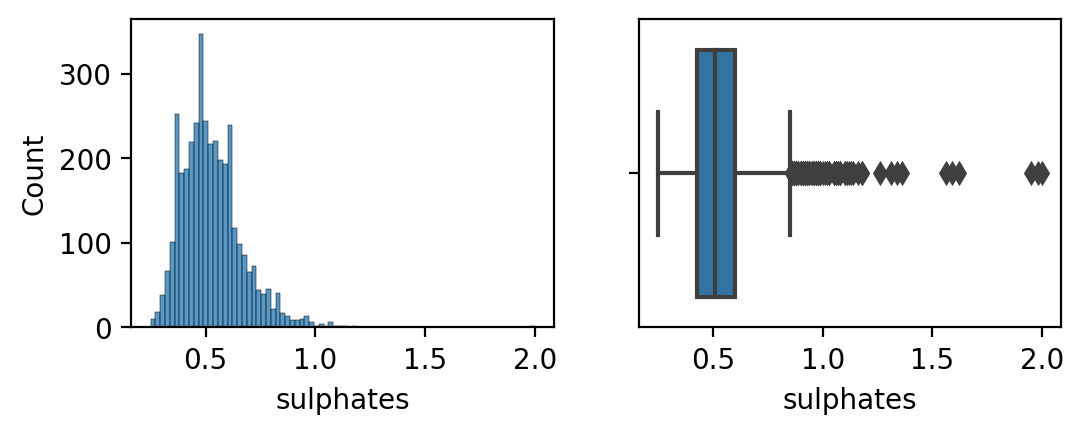


------------------------------------------------------------ 
 ALCOHOL 

Most Frequent Values:
9.5    200
9.4    195
9.2    148
Name: alcohol, dtype: int64


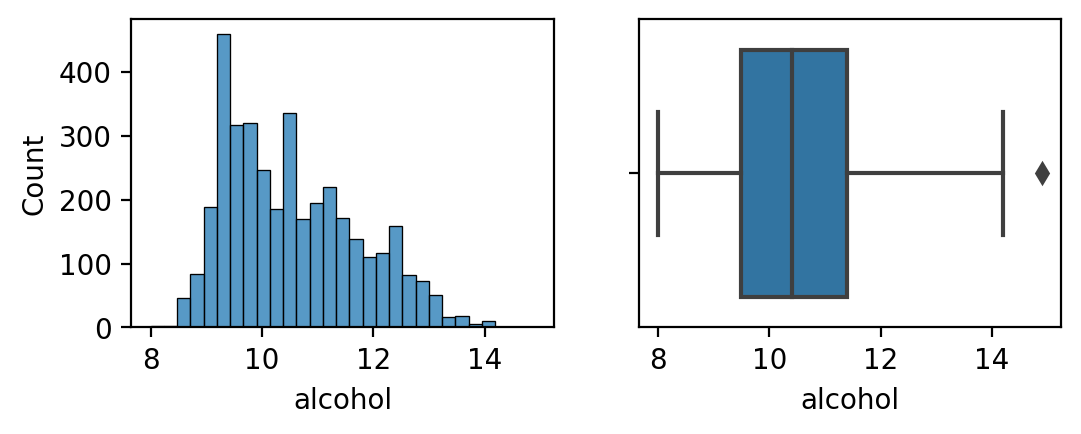

In [5]:
e.explore_univariate_continuous_cols(train)

**Bivariate Analysis**

- color of the wine seems independent of quality
- Features that drive quality: $r > .2$
    - `['alcohol', 'density', 'volatile acidity', 'chlorides' ]`
- Features that don't drive quality: $r < .1$
    - `['color', 'fixed acidity', 'citric acid', 'residual sugar',
        'free sulfur dioxide', 'total sulfur dioxide', 'pH', 'sulphates']`, 

red group quality stats


red              0           1
count  2787.000000  937.000000
mean      5.846789    5.598719
std       0.886927    0.821141
min       3.000000    3.000000
25%       5.000000    5.000000
50%       6.000000    6.000000
75%       6.000000    6.000000
max       9.000000    8.000000

red group quality averages


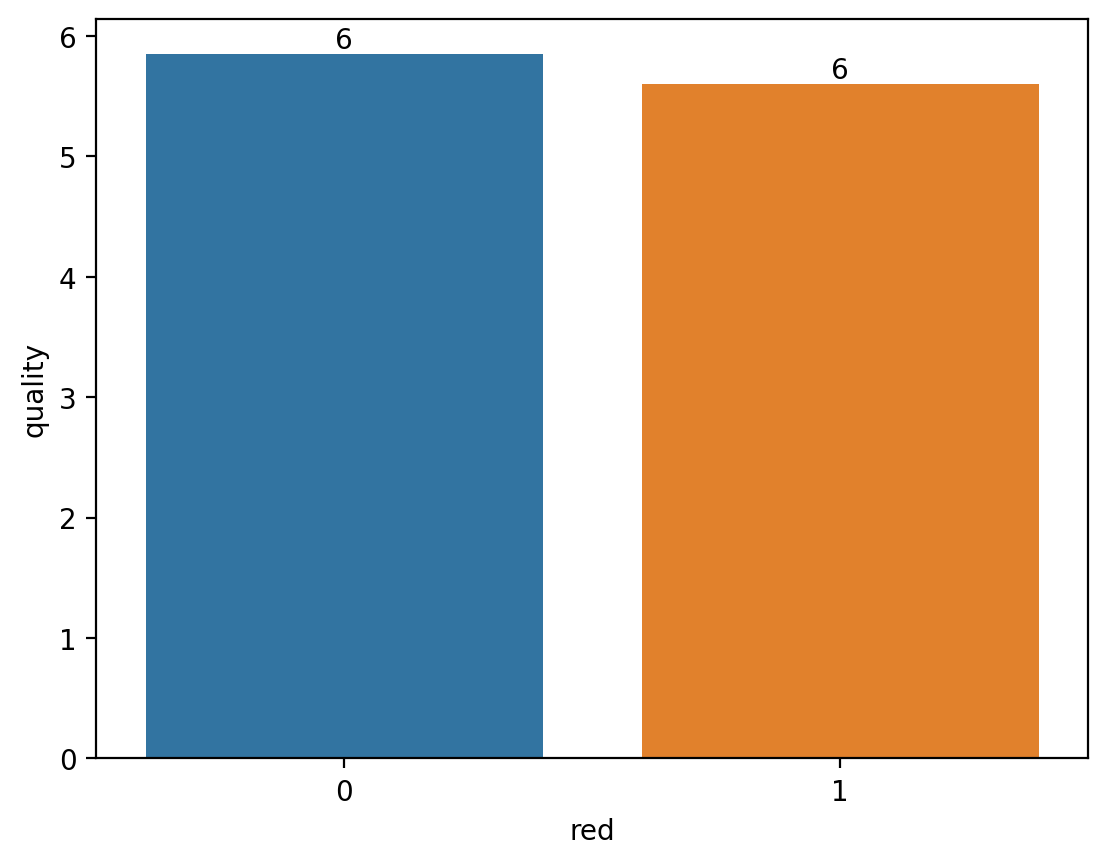

red group quality distributions


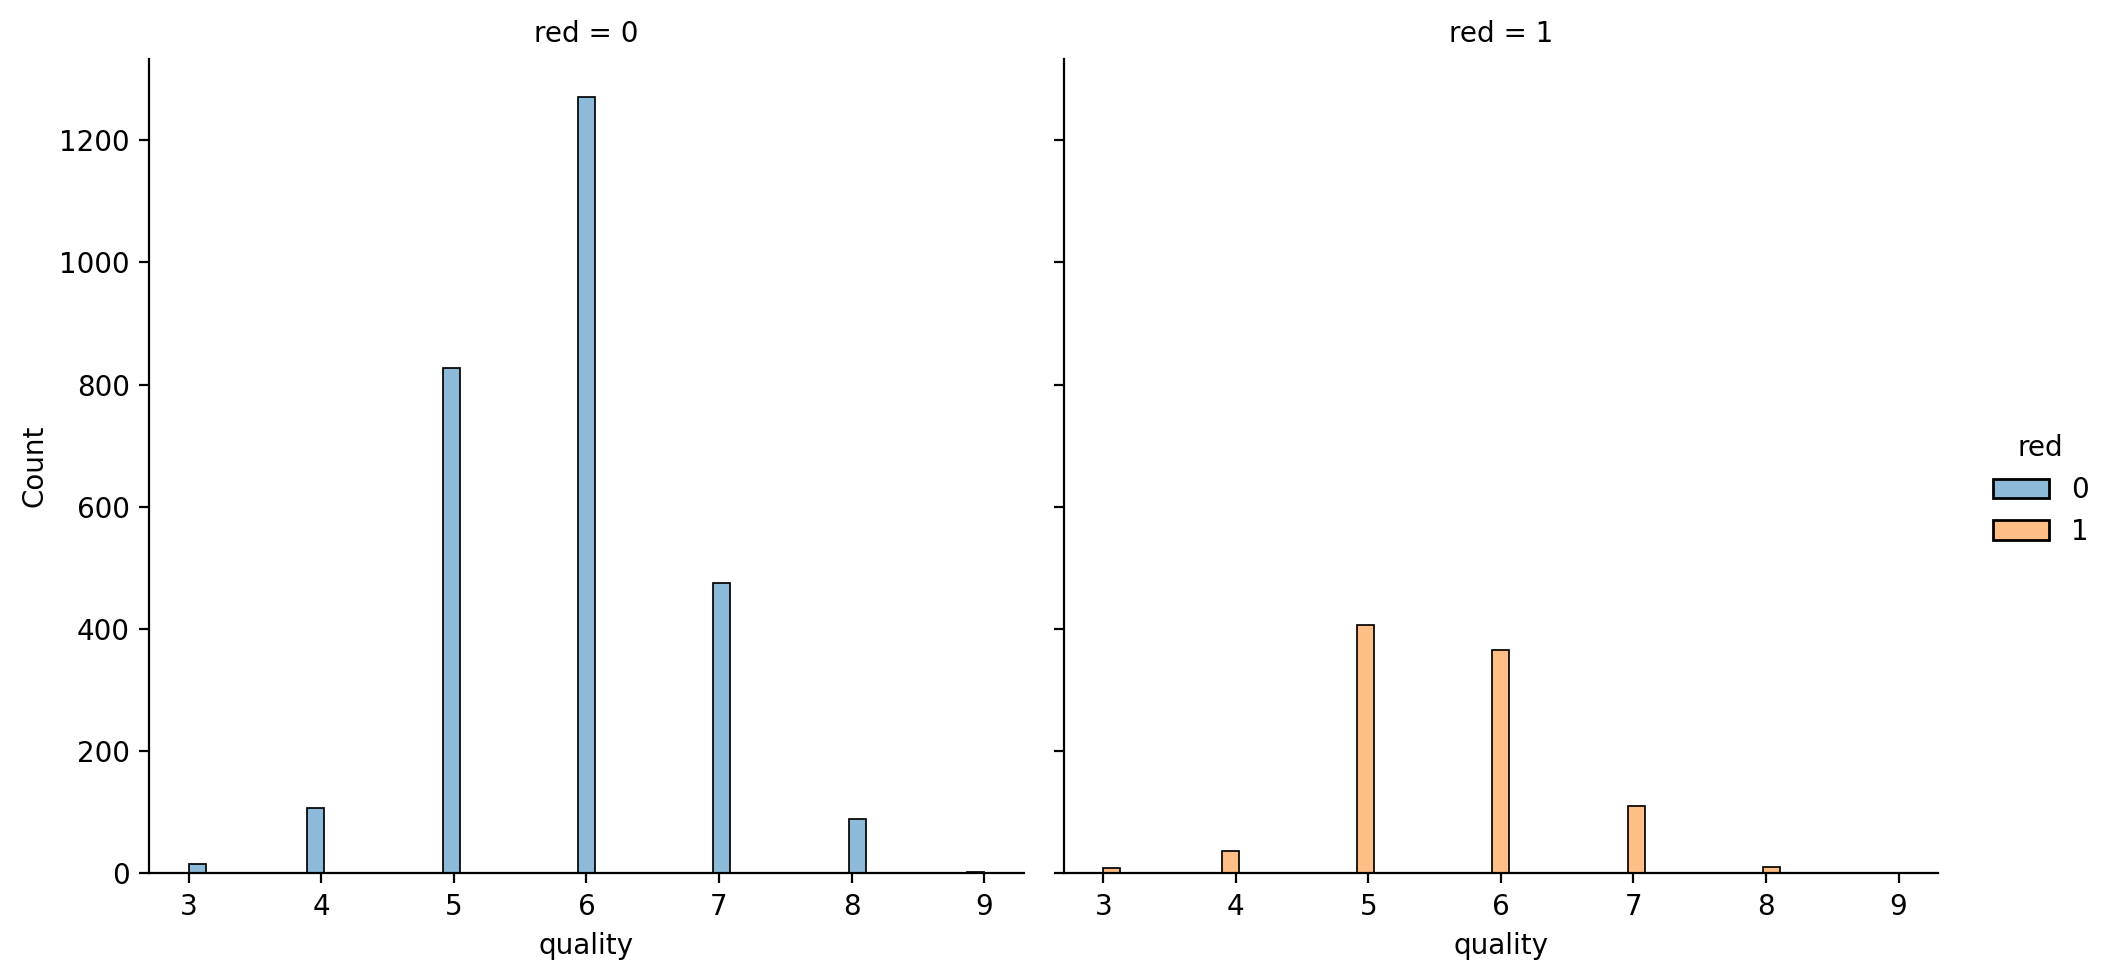

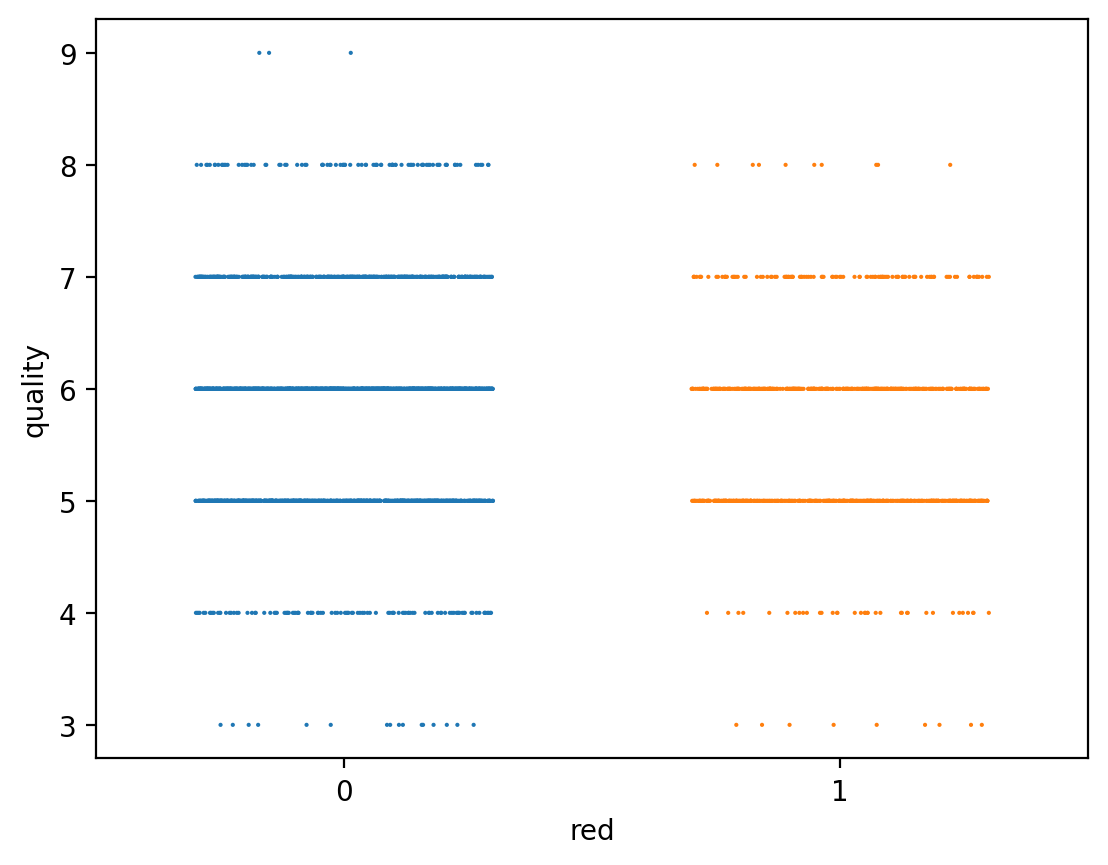

red group quality boxplots


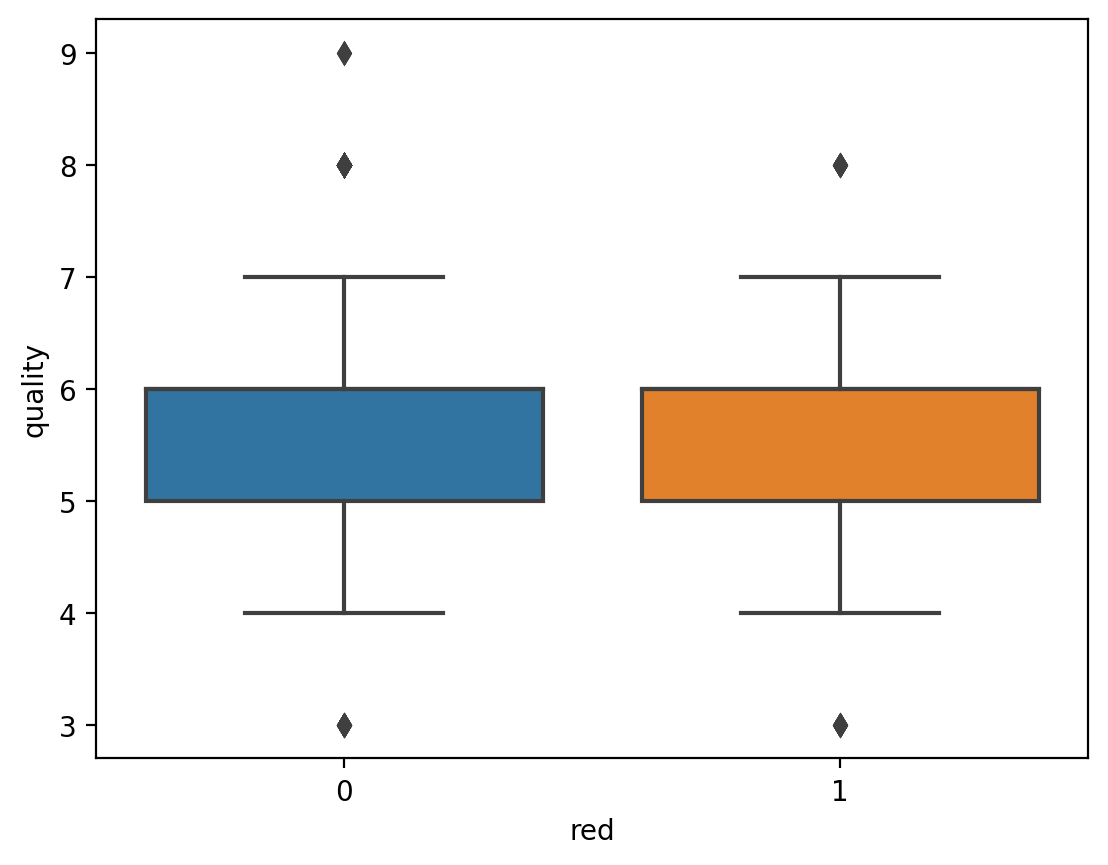

In [6]:
e.explore_bivariate_cat_to_cont_target(train, target='quality',
                                       cat_cols=['red'])

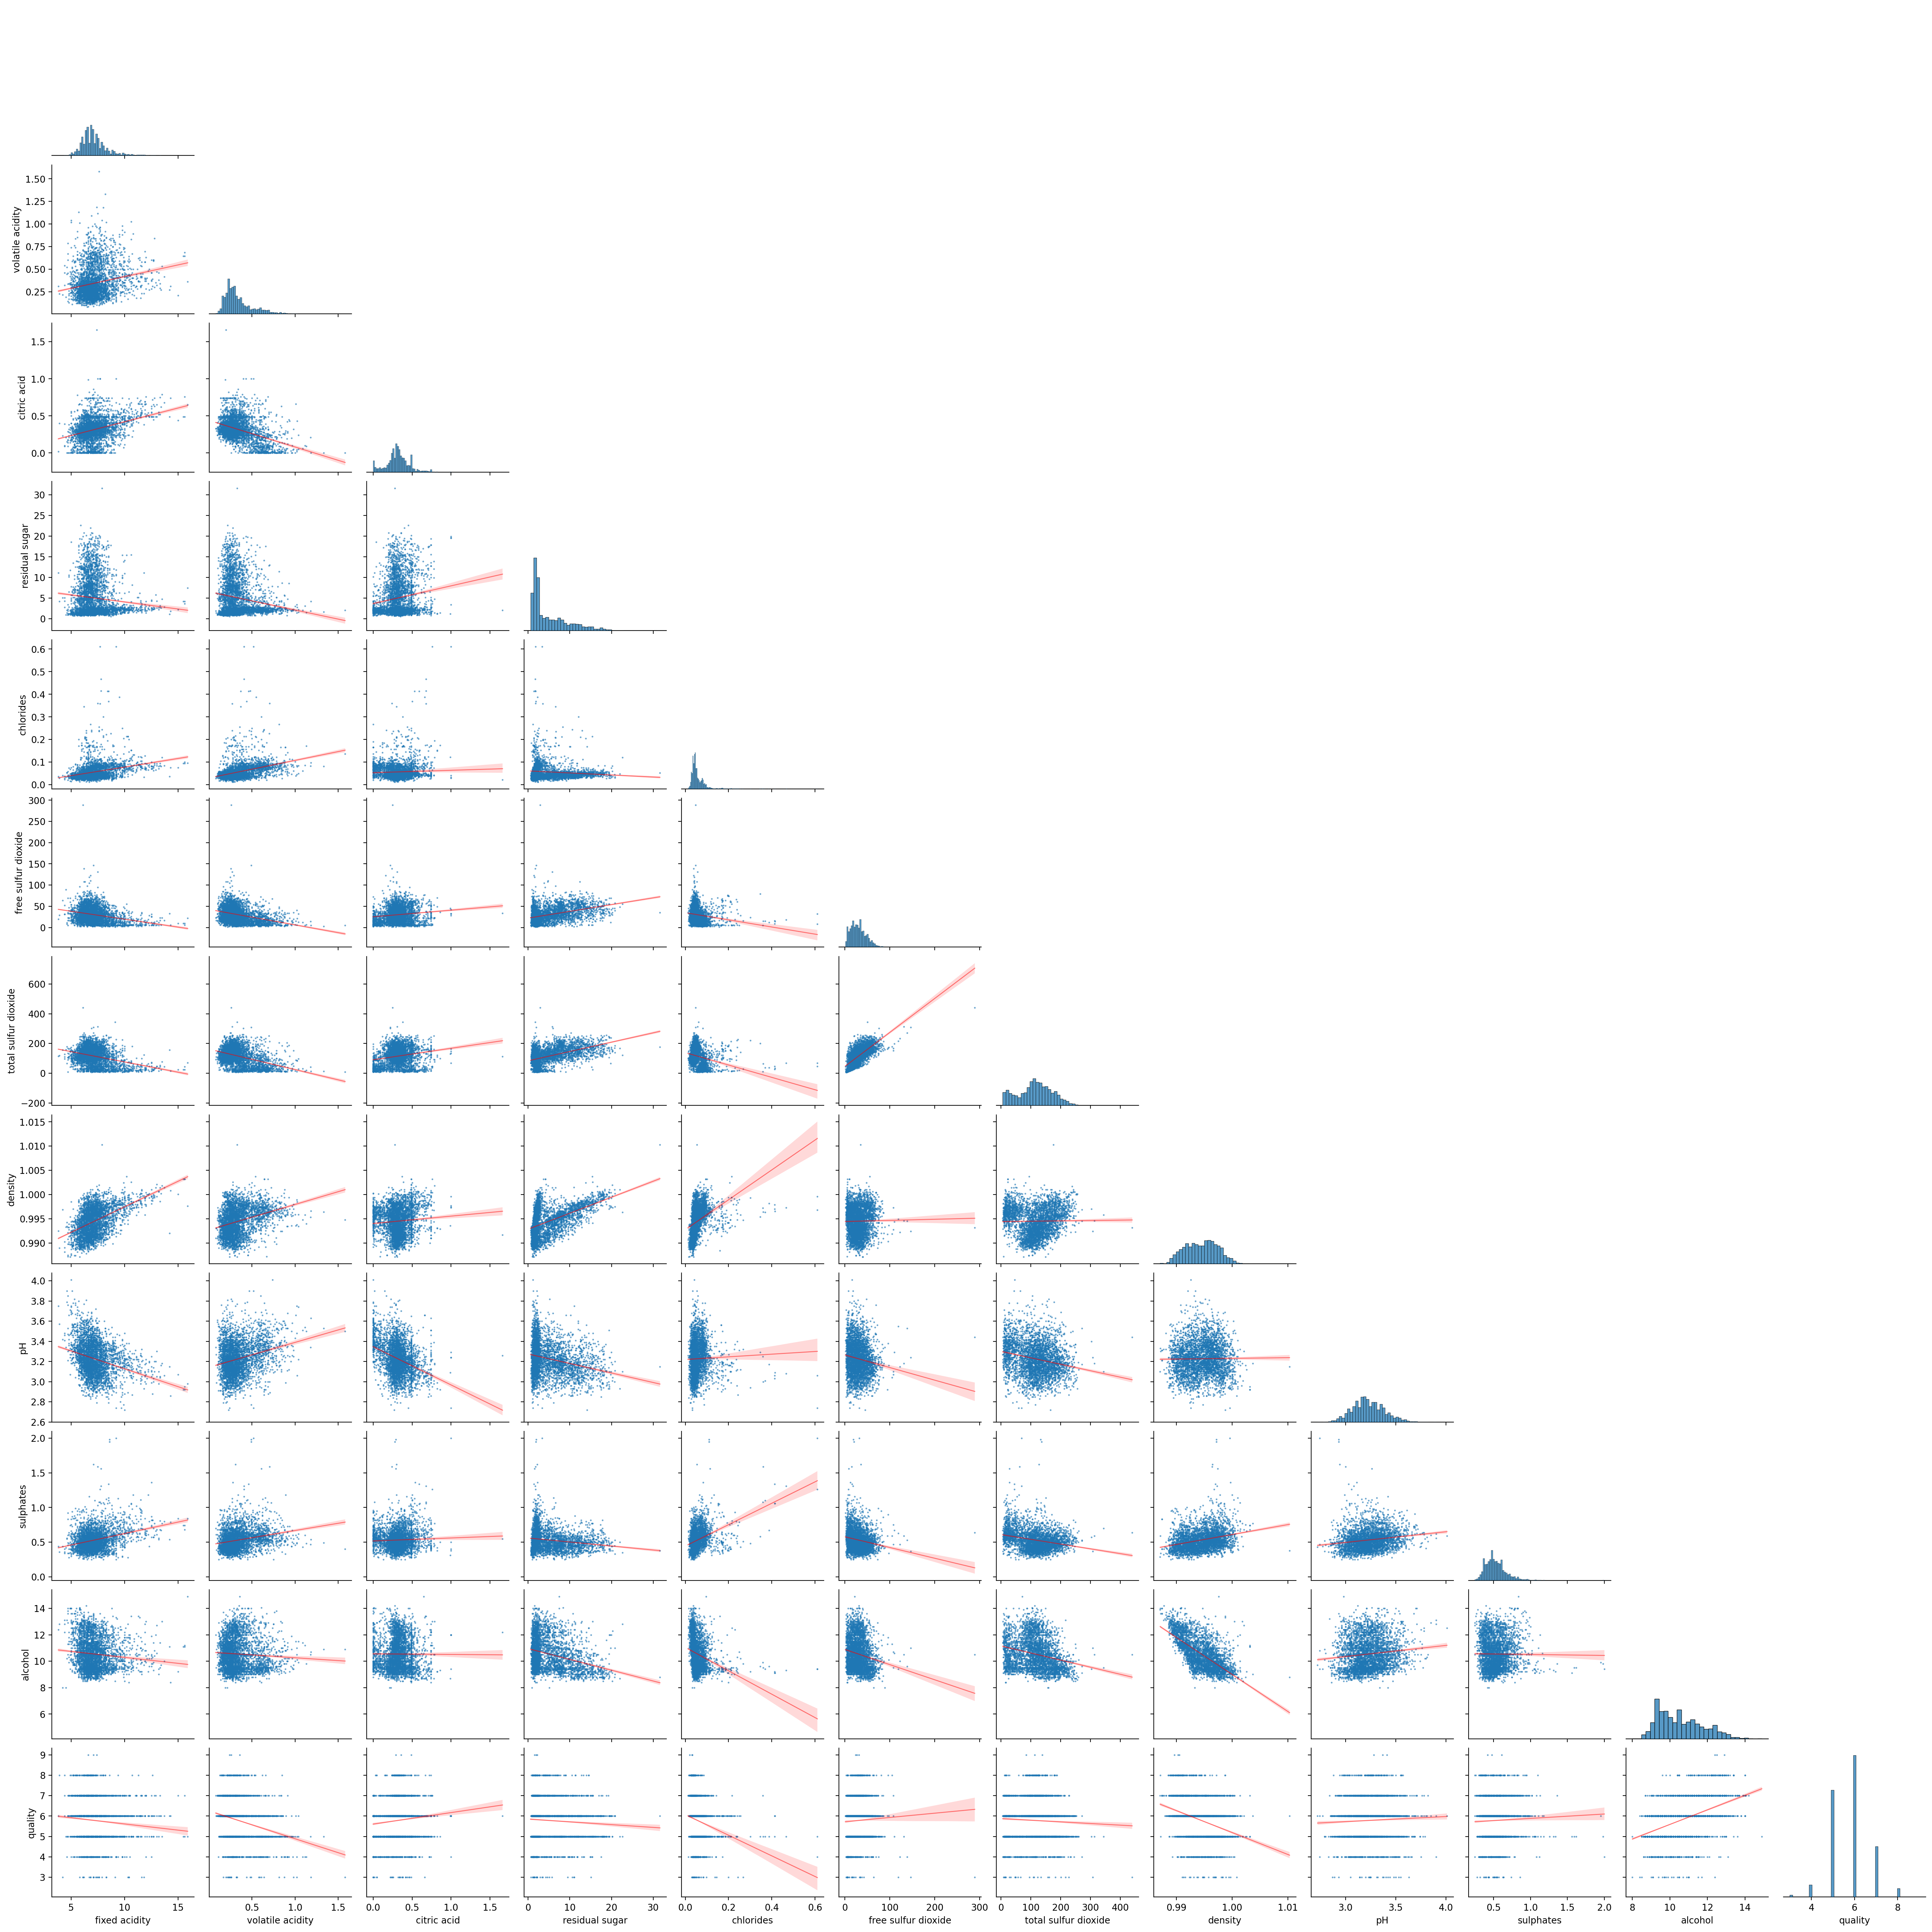

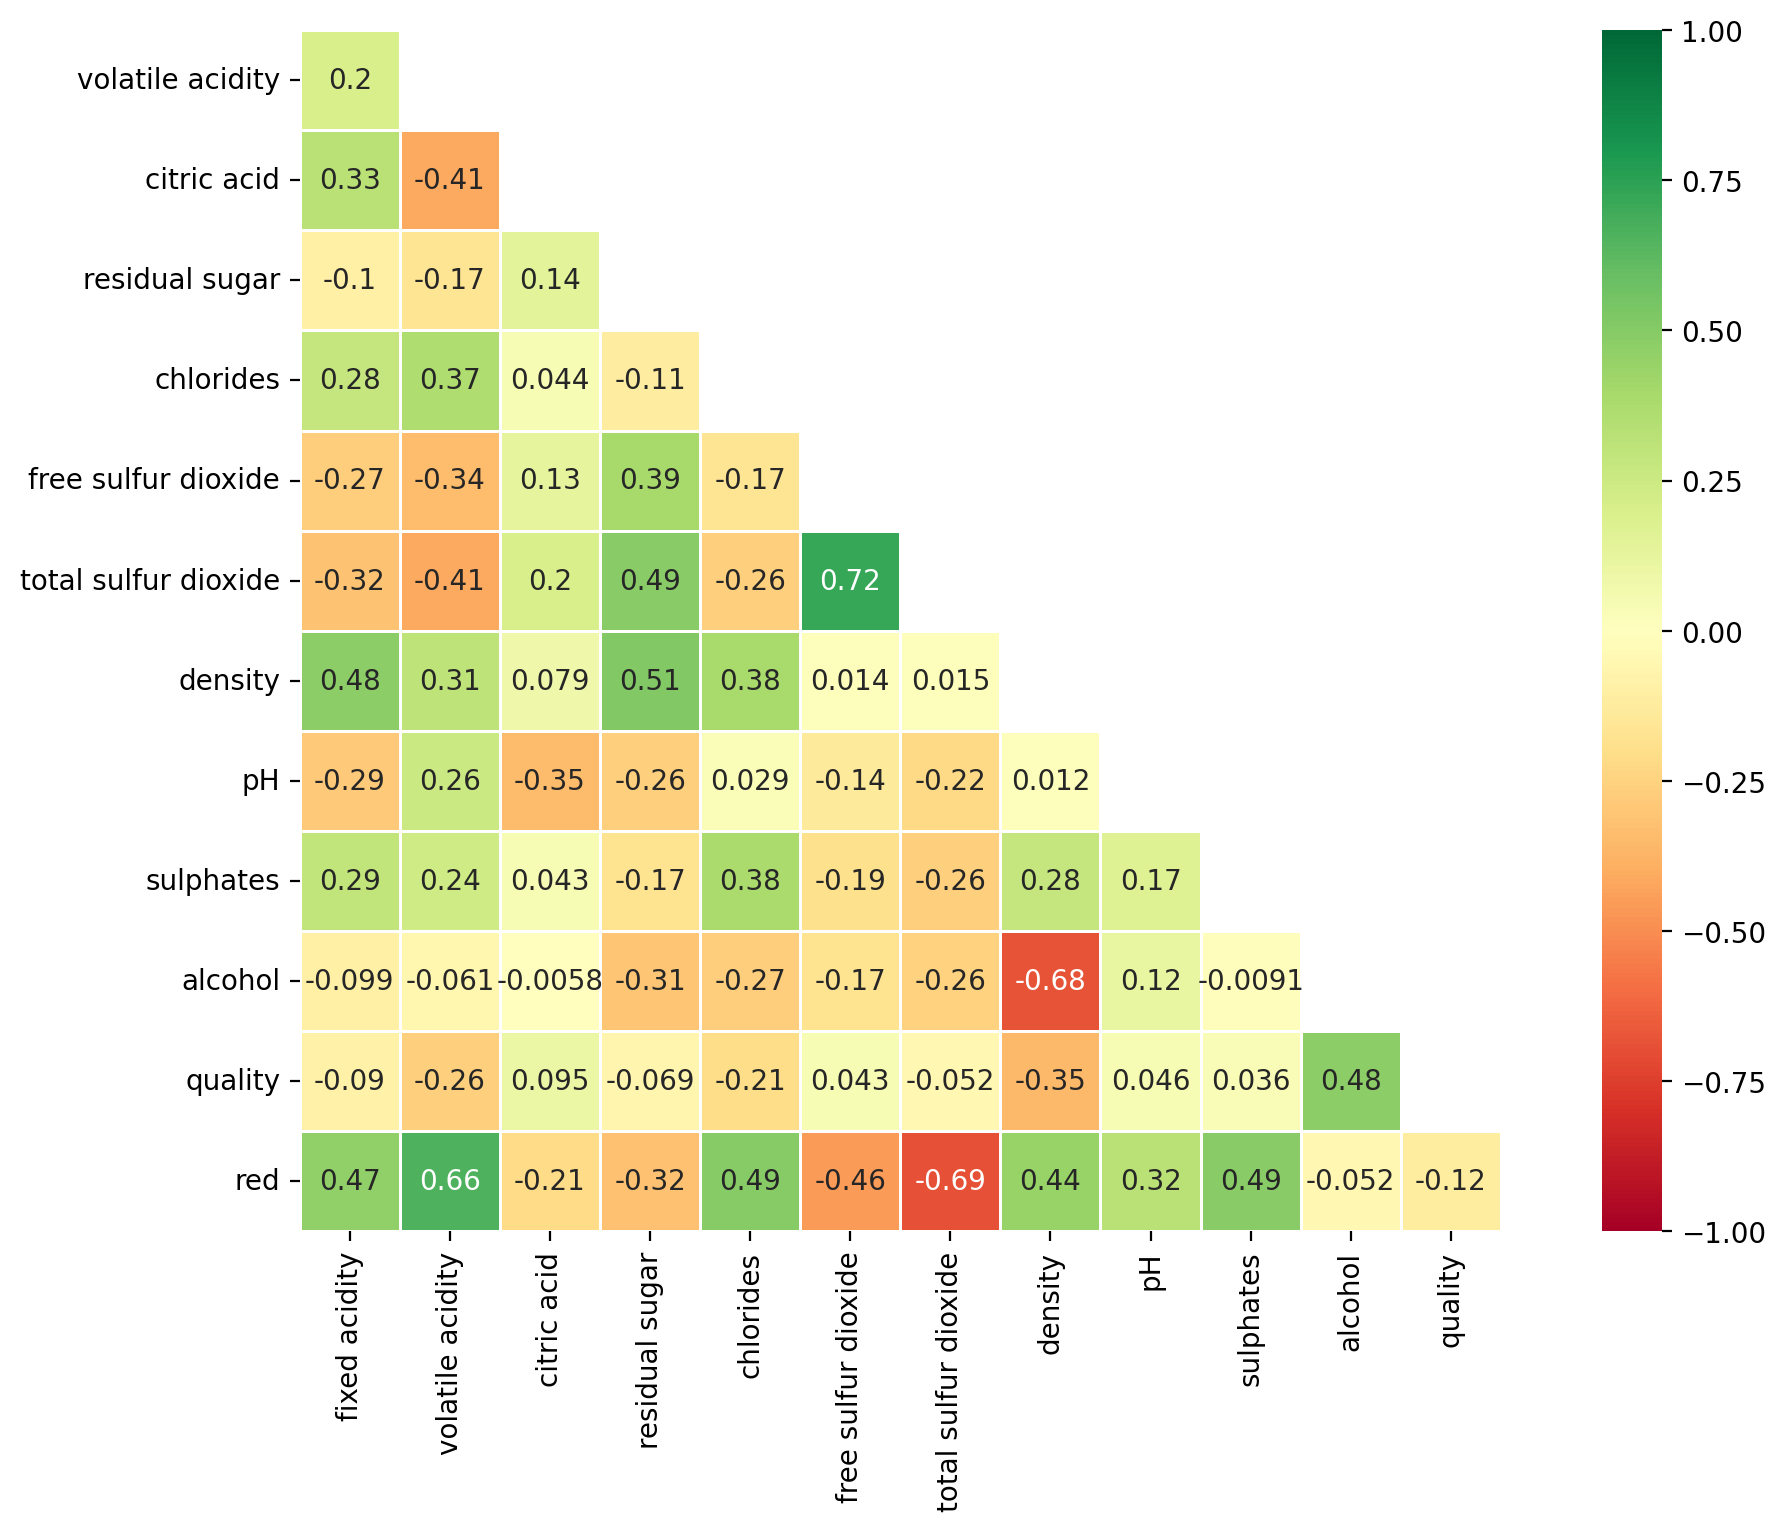

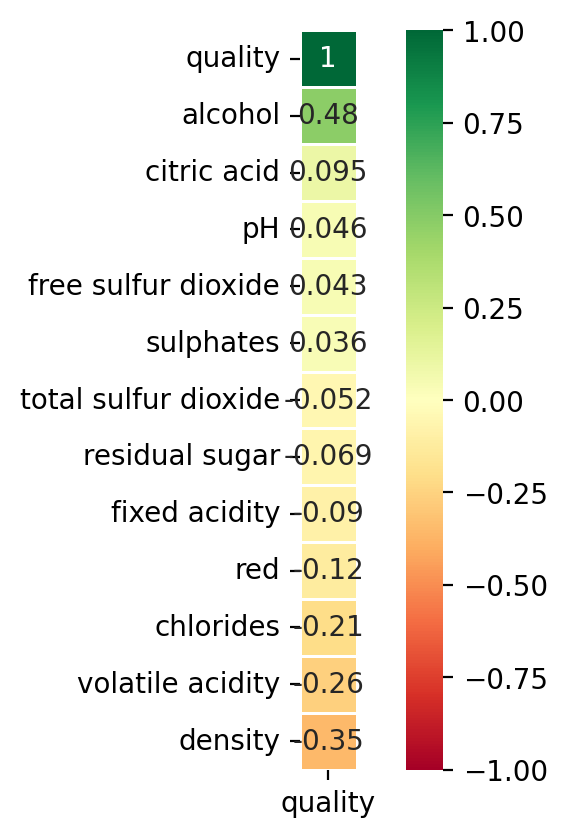

In [7]:
e.explore_bivariate_cont_to_cont_target(train, target='quality',
                                        cont_cols=e.get_cat_and_cont_cols(train)[1] + ['quality'])

In [8]:
def plot_key_features():
    df = train
    target='quality'

    plt.figure(figsize=(1.5,5))
    ax = sns.heatmap(df[abs(df.corr()[target]).sort_values(ascending=False).index].corr()[target].to_frame()[1:],
                        annot=True, cmap='RdYlGn', vmin=-1, vmax=1)
    cbar = ax.collections[0].colorbar
    cbar.ax.tick_params(right=False, labelsize=8) 
    cbar.set_ticks([-1, -.5, 0, .5, 1])
    plt.tick_params(axis='both', left=False, bottom=False)

    rectangle = patches.Rectangle((0, 0), 1, 4, linewidth=1.5, edgecolor='#C40000', facecolor='none')
    ax.add_patch(rectangle)

    plt.title('4 Strongest Drivers of Quality')
    plt.show()

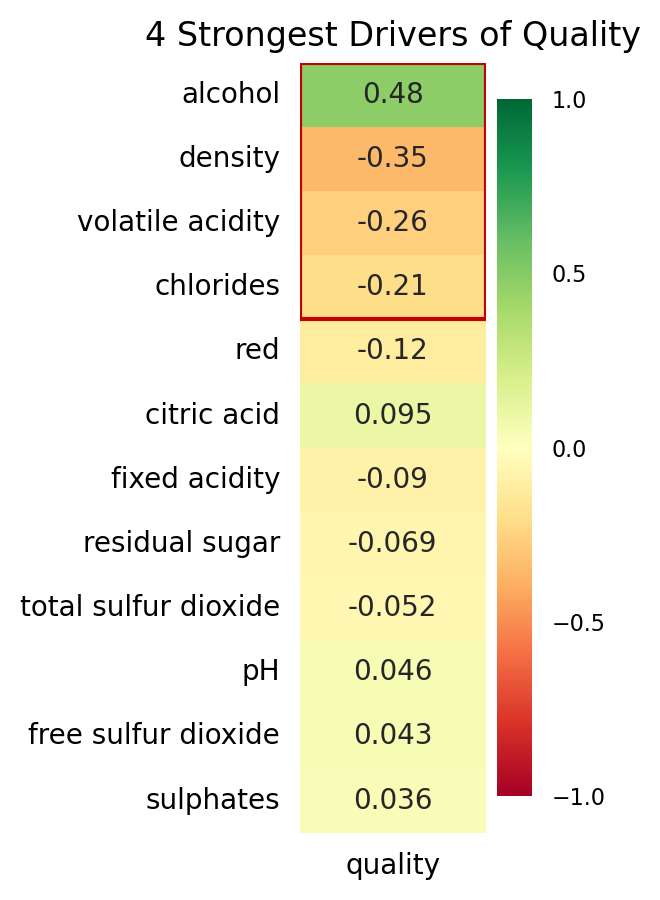

In [9]:
plot_key_features()

In [10]:
def plot_alcohol_by_quality():
    fig, axes = plt.subplots(2, 1, figsize=(6,6))
    sns.barplot(data=train, x='quality', y='alcohol', color='green',
                errorbar=None, ax=axes[0])

    for p in axes[0].patches:
        axes[0].annotate(f'$ {str(round(p.get_height(), 1))}%', 
                    (p.get_x() + p.get_width() / 2, p.get_height()),
                    ha='center', va='bottom', fontsize=8)

    axes[0].set_xlabel('')

    sns.stripplot(data=train, x='quality', y='alcohol', size=1, 
                  color='green', jitter=.2, ax=axes[1])

    axes[1].set_xlabel('Quality', fontsize=10, labelpad=5)

    plt.suptitle('Higher Quality Wines Have More Alcohol')

    for ax in axes:
        ax.set_ylabel('Alcohol', rotation=0, fontsize=10, labelpad=20)
        ax.tick_params(axis='both', left=False, bottom=False, labelsize=8)
        ax.yaxis.set_major_formatter(FuncFormatter(lambda x, pos: f'{round(x)}%'))

    sns.despine()
    plt.tight_layout()
    plt.show()

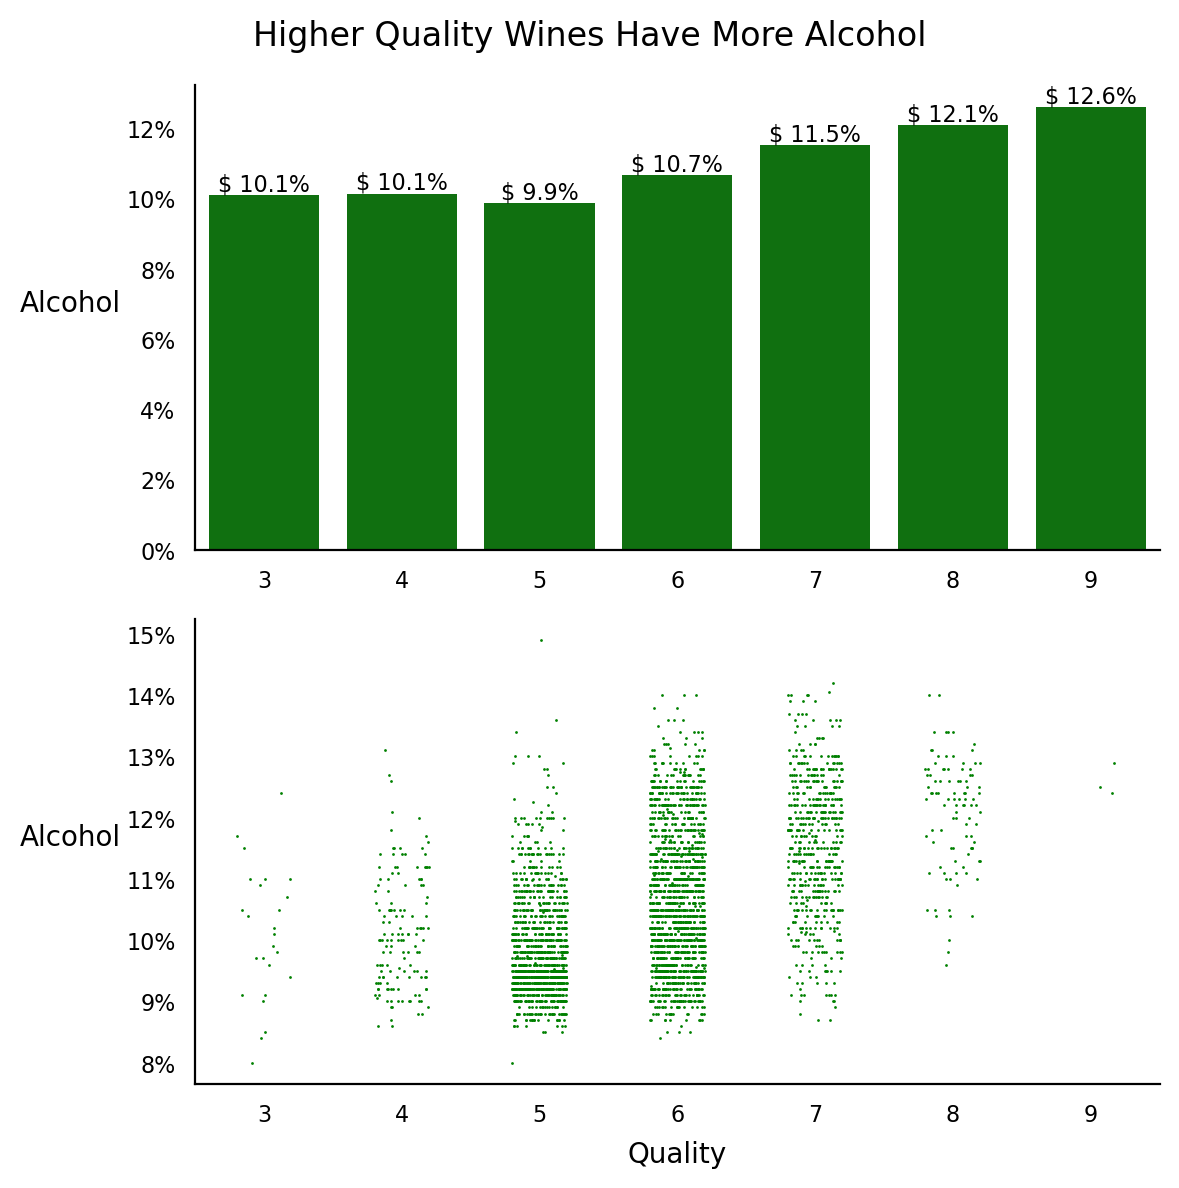

In [11]:
plot_alcohol_by_quality()

**Clustering**

Find clusters/groups from strong features

In [12]:
scaler = MinMaxScaler()

Scale Training data

In [14]:
train_sc = pd.concat([pd.DataFrame(data=scaler.fit_transform(train.drop(columns=['quality'])),
                                   columns=train.drop(columns=['quality']).columns),
                      train[['quality']].reset_index().iloc[:,1]],
                      axis=1)

In [15]:
train_sc.head()

fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0       0.289256          0.160000     0.174699        0.029032   0.043406   
1       0.190083          0.060000     0.168675        0.125806   0.035058   
2       0.314050          0.146667     0.150602        0.119355   0.070117   
3       0.214876          0.153333     0.301205        0.167742   0.043406   
4       0.148760          0.120000     0.000000        0.309677   0.043406   

   free sulfur dioxide  total sulfur dioxide   density        pH  sulphates  \
0             0.107639              0.317972  0.252264  0.372093   0.171429   
1             0.156250              0.331797  0.266925  0.550388   0.137143   
2             0.072917              0.241935  0.366106  0.310078   0.137143   
3             0.142361              0.241935  0.206123  0.356589   0.160000   
4             0.041667              0.241935  0.260457  0.558140   0.120000   

    alcohol  red  quality  
0  0.405797  0.0        5  
1  0.420290  0.0        6  
2  0.173913  0.0        5  
3  0.565217  0.0        7  
4  0.637681  0.0        6

In [16]:
validate_sc = pd.concat([pd.DataFrame(data=scaler.transform(validate.drop(columns=['quality'])),
                                   columns=validate.drop(columns=['quality']).columns),
                         validate[['quality']].reset_index().iloc[:,1]],
                         axis=1)

In [17]:
test_sc = pd.concat([pd.DataFrame(data=scaler.transform(test.drop(columns=['quality'])),
                                   columns=test.drop(columns=['quality']).columns),
                     test[['quality']].reset_index().iloc[:,1]],
                     axis=1)

In [18]:
# # run to see all scatterplots hued on quality
# plt.figure(figsize=(40,20))

# sns.pairplot(data=train_sc, corner=True,
#              hue='quality', plot_kws={'s': 3, 'alpha': .1})

**Cluster**

- `['alcohol', 'volatile acidity', 'chlorides']`
- `[‘alcohol', ‘density’, 'citric acid’]`
- `[‘alcohol', ‘sugar, ‘ph’]`
- `['Total sulfur dioxide', 'density']`

Cluster on combination of 2 features

In [19]:
len(list(combinations(train_sc.columns, 2)))

78

How well can we cluster off 2 features?
- lower inertia means we have denser clusters
- **Note:** this doesn't tell us how useful these clusters will be at predicting quality.

In [20]:
# # run for elbow plots
# for combo in [list(tup) for tup in list(combinations(train_sc.columns, 2))]:
#     print('-'*20)
#     print(combo)
#     plt.figure(figsize=(4, 3))
#     pd.Series({k: KMeans(k).fit(train_sc[combo]).inertia_ for k in range(2, 12)}).plot(marker='x')
#     plt.xticks(range(2, 12))
#     plt.xlabel('k')
#     plt.ylabel('inertia')
#     plt.title('Change in inertia as k increases')
#     plt.show()

Cluster on combination of 3 features

In [21]:
len(list(combinations(train_sc.columns, 3)))

286

How well can we cluster off 3 features?
- lower inertia means we have denser clusters
- **Note:** this doesn't tell us how useful these clusters will be at predicting quality.

In [22]:
# # run for elbow plots
# for combo in [list(tup) for tup in list(combinations(train_sc.columns, 3))]:
#     print('-'*20)
#     print(combo)
#     plt.figure(figsize=(4, 3))
#     pd.Series({k: KMeans(k).fit(train_sc[combo]).inertia_ for k in range(2, 12)}).plot(marker='x')
#     plt.xticks(range(2, 12))
#     plt.xlabel('k')
#     plt.ylabel('inertia')
#     plt.title('Change in inertia as k increases')
#     plt.show()

Cluster group 1:

- 4 clusters off `['fixed acidity', 'chlorides', 'alcohol']`

In [23]:
feats1 = ['fixed acidity', 'chlorides', 'alcohol']

kmeans1 = KMeans(n_clusters=4, random_state=123).fit(train_sc[feats1])

train['clusters_1'] = kmeans1.predict(train_sc[feats1])
validate['clusters_1'] = kmeans1.predict(validate_sc[feats1])
test['clusters_1'] = kmeans1.predict(test_sc[feats1])

Cluster group 2:

- 4 clusters off `['fixed acidity', 'alcohol']`

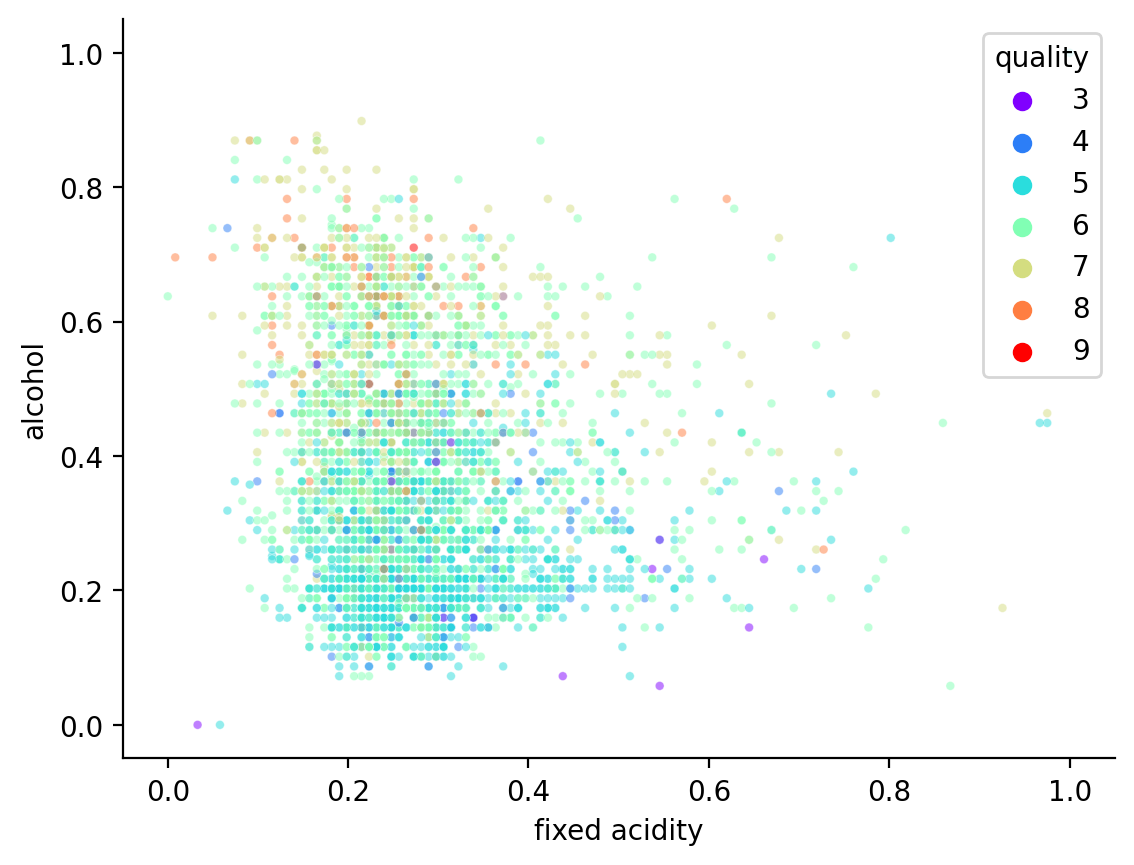

In [24]:
sns.scatterplot(data=train_sc, x='fixed acidity', y='alcohol', hue='quality',
                    s=10, alpha=.5, palette='rainbow')
sns.despine()
plt.show()

In [25]:
feats2 = ['fixed acidity', 'alcohol']

kmeans2 = KMeans(n_clusters=4, random_state=123).fit(train_sc[feats2])

train['clusters_2'] = kmeans2.predict(train_sc[feats2])
validate['clusters_2'] = kmeans2.predict(validate_sc[feats2])
test['clusters_2'] = kmeans2.predict(test_sc[feats2])

Cluster group 3:

- 4 clusters off `['free sulfur dioxide', 'residual sugar', 'alcohol']`

In [26]:
feats3 = ['free sulfur dioxide', 'residual sugar', 'alcohol']

kmeans3 = KMeans(n_clusters=4, random_state=123).fit(train_sc[feats3])

train['clusters_3'] = kmeans3.predict(train_sc[feats3])
validate['clusters_3'] = kmeans3.predict(validate_sc[feats3])
test['clusters_3'] = kmeans3.predict(test_sc[feats3])

Explore Clusters

Cluster 2 in the first group of clusters yields much higher quality.

In [27]:
train.groupby('clusters_1')['quality'].mean()

clusters_1
0    5.611446
1    5.411569
2    6.483333
3    5.882705
Name: quality, dtype: float64

Cluster 2 in the second group of clusters yields much higher quality.

In [28]:
train.groupby('clusters_2')['quality'].mean()

clusters_2
0    5.408847
1    5.881803
2    6.483333
3    5.613095
Name: quality, dtype: float64

Cluster 1 in the third group of clusters yields much higher quality.

In [29]:
train.groupby('clusters_3')['quality'].mean()

clusters_3
0    5.547847
1    6.502865
2    5.386784
3    5.924171
Name: quality, dtype: float64

In [30]:
train['quality'].mean()

5.784371643394199

Save new cluster features onto the original data

In [31]:
df = pd.concat([train, validate, test]).sort_index()
df.head()

fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.4              0.70         0.00             1.9      0.076   
0            7.0              0.27         0.36            20.7      0.045   
1            6.3              0.30         0.34             1.6      0.049   
1            7.8              0.88         0.00             2.6      0.098   
2            7.8              0.76         0.04             2.3      0.092   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 11.0                  34.0   0.9978  3.51       0.56   
0                 45.0                 170.0   1.0010  3.00       0.45   
1                 14.0                 132.0   0.9940  3.30       0.49   
1                 25.0                  67.0   0.9968  3.20       0.68   
2                 15.0                  54.0   0.9970  3.26       0.65   

   alcohol  quality  red  clusters_1  clusters_2  clusters_3  
0      9.4        5    1           1           0           2  
0      8.8        6    0           1           0           0  
1      9.5        6    0           1           0           2  
1      9.8        5    1           1           0           2  
2      9.8        5    1           1           0           2

Add cluster code to preprocess code in `model.py`

---
Code for extra visualizations:

In [32]:
def plot_alcohol_by_quality():
    fig, axes = plt.subplots(2, 1, figsize=(6,6))
    sns.barplot(data=train, x='quality', y='alcohol', color='green',
                errorbar=None, ax=axes[0])

    for p in axes[0].patches:
        axes[0].annotate(f'$ {str(round(p.get_height(), 1))}%', 
                    (p.get_x() + p.get_width() / 2, p.get_height()),
                    ha='center', va='bottom', fontsize=8)

    axes[0].set_xlabel('')

    sns.stripplot(data=train, x='quality', y='alcohol', size=1, 
                  color='green', jitter=.2, ax=axes[1])

    axes[1].set_xlabel('Quality', fontsize=10, labelpad=5)

    plt.suptitle('Higher Quality Wines Have More Alcohol')

    for ax in axes:
        ax.set_ylabel('Alcohol', rotation=0, fontsize=10, labelpad=20)
        ax.tick_params(axis='both', left=False, bottom=False, labelsize=8)
        ax.yaxis.set_major_formatter(FuncFormatter(lambda x, pos: f'{round(x)}%'))

    sns.despine()
    plt.tight_layout()
    plt.show()

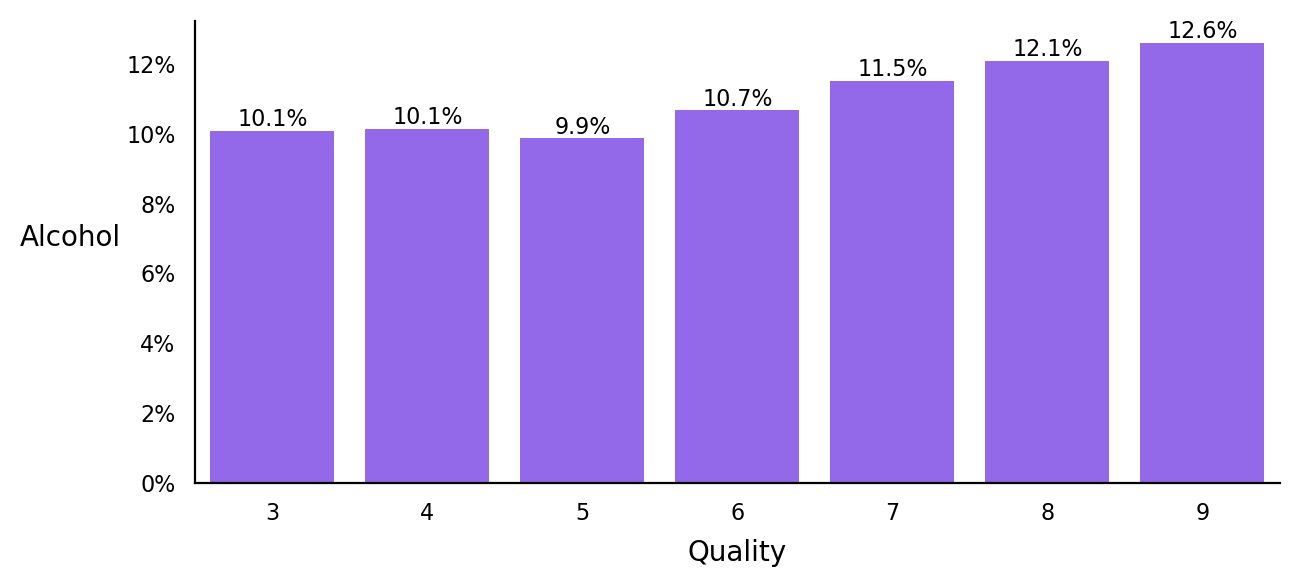

In [33]:
plt.figure(figsize=(7,3))
sns.barplot(data=train, x='quality', y='alcohol', color='#8c52ff',
            errorbar=None)

ax = plt.gca()
for p in ax.patches:
    ax.annotate(f'{str(round(p.get_height(), 1))}%', 
                (p.get_x() + p.get_width() / 2, p.get_height()),
                ha='center', va='bottom', fontsize=8)
    
ax.set_xlabel('Quality', fontsize=10, labelpad=5)
ax.set_ylabel('Alcohol', rotation=0, fontsize=10, labelpad=20)
ax.tick_params(axis='both', left=False, bottom=False, labelsize=8)
ax.yaxis.set_major_formatter(FuncFormatter(lambda x, pos: f'{round(x)}%'))

sns.despine()

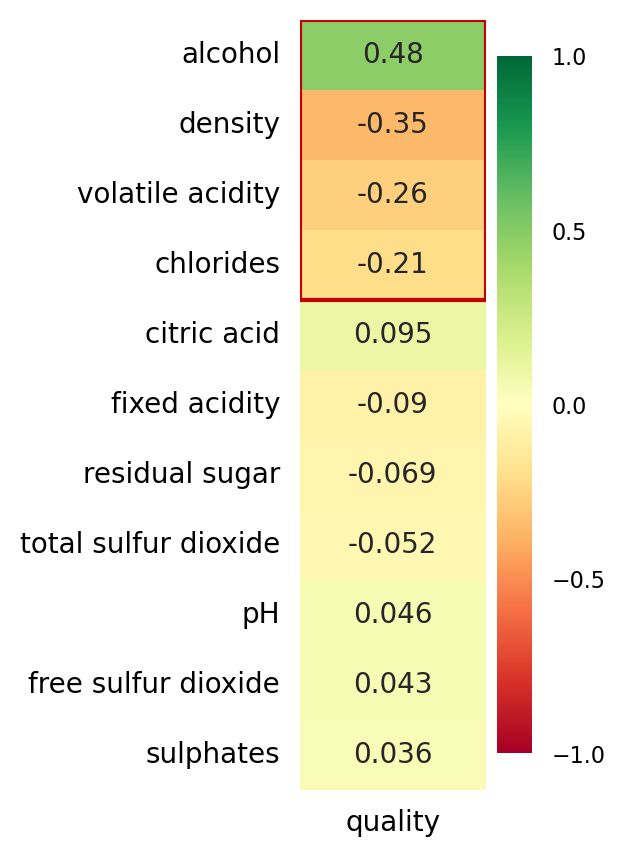

In [34]:
plt.figure(figsize=(1.5,5))
ax = sns.heatmap(train[abs(train[['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
                               'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
                               'pH', 'sulphates', 'alcohol', 'quality']].corr()['quality']).sort_values(ascending=False).index].corr()['quality'].to_frame()[1:],
                    annot=True, cmap='RdYlGn', vmin=-1, vmax=1)
cbar = ax.collections[0].colorbar
cbar.ax.tick_params(right=False, labelsize=8) 
cbar.set_ticks([-1, -.5, 0, .5, 1])
plt.tick_params(axis='both', left=False, bottom=False)

rectangle = patches.Rectangle((0, 0), 1, 4, linewidth=1.5, edgecolor='#C40000', facecolor='none')
ax.add_patch(rectangle)


plt.show()

In [35]:
from scipy import stats
for col in ['alcohol', 'density', 'volatile acidity', 'chlorides', 'citric acid',
               'fixed acidity', 'residual sugar', 'total sulfur dioxide', 'pH',
               'free sulfur dioxide', 'sulphates']:
    r_stat, p_val = stats.pearsonr(train['quality'], train[col])
    print(round(p_val,2))
    

0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.01
0.03
